Importing all the required libraries

In [16]:

import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import optimizers


Train, Test and Validation dataset path

Load files 





In [17]:
train_path = 'C:/Users/Owner/Desktop/Produce Item Recognition/DataSet/TrainSet/'
valid_path = 'C:/Users/Owner/Desktop/Produce Item Recognition/DataSet/ValidationSet/'
test_path = 'C:/Users/Owner/Desktop/Produce Item Recognition/DataSet/TestSet/'


train_image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(valid_path + '/*/*.jp*g')

Class distribution in train and validation set

In [18]:
import os
entries = os.listdir(train_path)
folders = glob(train_path + '/*')
train_class_dist={}
count=0
for folder in folders:
  number_of_images=glob(folder+'/*.jp*g')
  train_class_dist[entries[count]]=len(number_of_images)
  count+=1

valid_entries = os.listdir(valid_path)
valid_folders = glob(valid_path + '/*')
valid_class_dist={}
count=0
for folder in valid_folders:
  valid_number_of_images=glob(folder+'/*.jp*g')
  valid_class_dist[entries[count]]=len(valid_number_of_images)
  count+=1



Plot Train dataset class distribution

In [19]:
!pip install plotly
import plotly.express as px

fig = px.bar(train_class_dist.keys(), x=list(train_class_dist.keys()), y=list(train_class_dist.values()),labels={"y":"Class Size", "x":"Fruits and Vegetables"},title="Train DataSet")
fig.update_traces(texttemplate='%{y:.2s}', textposition='outside')

fig.show()

Plot Validation dataset class distribution

In [20]:

import plotly.express as px

fig = px.bar(valid_class_dist.keys(), x=list(valid_class_dist.keys()), y=list(valid_class_dist.values()),labels={"y":"Class Size", "x":"Fruits and Vegetables"},title="Validation DataSet")
fig.update_traces(texttemplate='%{y:.2s}', textposition='outside')

fig.show()

Image input shape, epochs and batch size

In [21]:
IMAGE_SIZE = [100, 100]
epochs = 50
train_batch_size =32
valid_batch_size=16
test_batch_size=4


Augmention only with rescle

In [24]:
gen = ImageDataGenerator(
    rescale=1./255,
    #featurewise_center=True,
    #featurewise_std_normalization=True,
    #rotation_range=10,
    #shear_range=0.2,
    #zoom_range=0.2,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    horizontal_flip=True,
    #vertical_flip=True,
    
)

test_gen = gen.flow_from_directory(valid_path, target_size=IMAGE_SIZE)
print(test_gen.class_indices)
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
  labels[v] = k

Found 7680 images belonging to 24 classes.
{'Apple': 0, 'Avocado': 1, 'Banana': 2, 'Blueberry': 3, 'Brocolli': 4, 'Cabbage': 5, 'Canada Pear': 6, 'Carrot': 7, 'Garlic': 8, 'Green Peas': 9, 'Green Pepper': 10, 'Lettuce': 11, 'Mangoes': 12, 'Okra': 13, 'Orange': 14, 'Pineapple': 15, 'Red Chilli': 16, 'Red Onions': 17, 'Spinach': 18, 'Spring Onion': 19, 'Tomato': 20, 'Yellow Onion': 21, 'Yellow Potato': 22, 'bell pepper': 23}


Found 19181 images belonging to 24 classes.


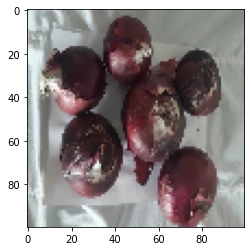

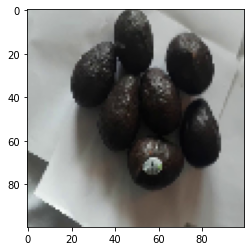

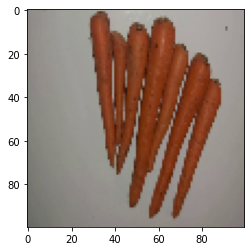

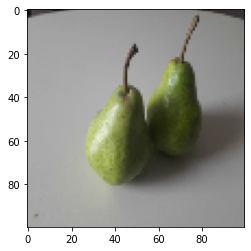

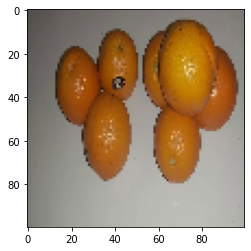

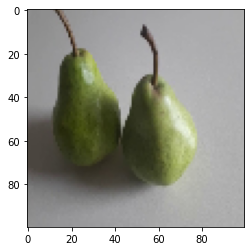

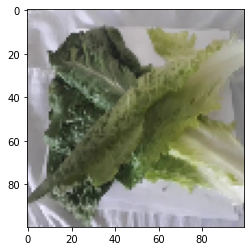

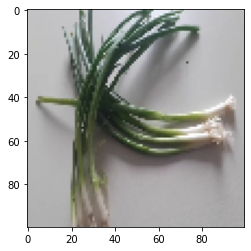

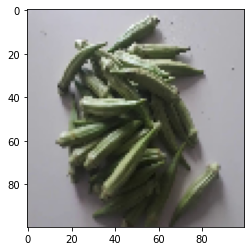

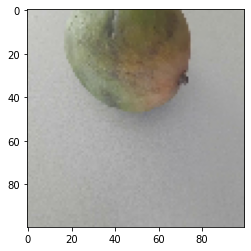

In [25]:
tgr = gen.flow_from_directory(
    train_path,
    color_mode = "rgb",
    target_size=(100,100),
    batch_size=1,
    class_mode=None)


i = 0
img_list = []
for batch in tgr:
    img_list.append(batch)
    i += 1
    if i > 9:
        break
        

for img in img_list:
    plt.imshow(np.squeeze(img))
    plt.show()

Visulaize augment images

In [26]:
train_generator = gen.flow_from_directory(
  train_path,
  color_mode = "rgb",
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=train_batch_size,
  seed=42,
    
)
valid_generator = gen.flow_from_directory(
  valid_path,
  color_mode = "rgb",
  target_size=IMAGE_SIZE,
  shuffle=False,
  batch_size=valid_batch_size,
  
)
test_generator = gen.flow_from_directory(
  test_path,
  color_mode = "rgb",
  target_size=IMAGE_SIZE,
  shuffle=False,
  
)

Found 19181 images belonging to 24 classes.
Found 7680 images belonging to 24 classes.
Found 7680 images belonging to 24 classes.


In [27]:
base_model=VGG16(weights='imagenet',include_top=False, input_shape=(100,100,3))

In [28]:
from keras.applications import VGG16
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(24, activation='softmax'))


In [29]:
model=Model(inputs=base_model.input, outputs=top_model(base_model.output))

In [30]:
for layer in model.layers[:15]:
    layer.trainable = False

In [31]:
model.compile(loss='categorical_crossentropy',
     optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
     metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0   

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("C:/Users/Owner/Desktop/Produce Item Recognition/vgg16.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=2, verbose=1, mode='auto')

r=model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  callbacks=[early,checkpoint],
  steps_per_epoch=len(train_image_files) // train_batch_size,
  validation_steps=len(valid_image_files) //valid_batch_size,
 
  
)


Epoch 1/50
599/599 [==============================] - 827s 1s/step - loss: 1.7493 - accuracy: 0.5103 - val_loss: 0.0485 - val_accuracy: 0.9596

Epoch 00001: val_accuracy improved from -inf to 0.95964, saving model to C:/Users/Owner/Desktop/Produce Item Recognition/vgg16.h5
Epoch 2/50
599/599 [==============================] - 492s 821ms/step - loss: 0.3158 - accuracy: 0.9167 - val_loss: 0.0083 - val_accuracy: 0.9930

Epoch 00002: val_accuracy improved from 0.95964 to 0.99297, saving model to C:/Users/Owner/Desktop/Produce Item Recognition/vgg16.h5
Epoch 3/50
599/599 [==============================] - 475s 793ms/step - loss: 0.1371 - accuracy: 0.9652 - val_loss: 0.0034 - val_accuracy: 0.9961

Epoch 00003: val_accuracy improved from 0.99297 to 0.99609, saving model to C:/Users/Owner/Desktop/Produce Item Recognition/vgg16.h5
Epoch 4/50
599/599 [==============================] - 476s 795ms/step - loss: 0.0802 - accuracy: 0.9814 - val_loss: 0.0020 - val_accuracy: 0.9979

Epoch 00004: val_ac

In [ ]:
model.save("vgg16.h5")

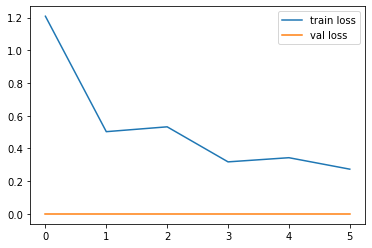

In [164]:

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')

plt.legend()
plt.show()

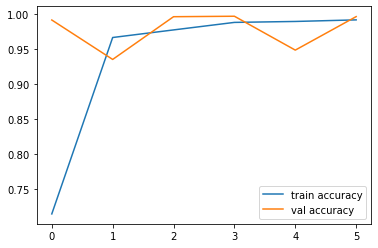

In [165]:

plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

In [5]:
model = load_model('vgg16.h5')

In [7]:
model.compile(loss='categorical_crossentropy',
     optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
     metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0   

In [8]:
test_image_files = glob(test_path + '/*/*.jp*g')

In [19]:
predictions = model.predict_generator(test_generator)



In [20]:
print(len(predictions))

7541


In [21]:
len(test_generator.classes)

7541

In [22]:

import numpy
import sklearn.metrics as metrics
predicted_classes = numpy.argmax(predictions, axis=1)

true_classes = test_generator.classes
print(len(predictions), len(true_classes),len(test_image_files))

class_labels = list(test_generator.class_indices.keys()) 

report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

7541 7541 7541
               precision    recall  f1-score   support

        Apple       1.00      1.00      1.00       320
      Avocado       1.00      1.00      1.00       320
       Banana       1.00      1.00      1.00       320
    Blueberry       1.00      1.00      1.00       320
     Brocolli       1.00      1.00      1.00       320
      Cabbage       1.00      0.97      0.98       320
  Canada Pear       1.00      1.00      1.00       320
       Carrot       1.00      1.00      1.00       320
       Garlic       0.99      1.00      0.99       320
   Green Peas       1.00      1.00      1.00       320
 Green Pepper       1.00      1.00      1.00       320
      Lettuce       1.00      1.00      1.00       242
      Mangoes       0.98      1.00      0.99       320
         Okra       1.00      1.00      1.00       320
       Orange       1.00      1.00      1.00       320
    Pineapple       1.00      1.00      1.00       320
   Red Chilli       1.00      1.00      1.00     

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_generator.classes, predicted_classes))

[[320   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 320   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 320   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 320   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0 320   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0 311   0   1   3   0   0   0   5   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 320   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 320   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 320   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 320   0   0   0   0   0   0   0   0
    0   0   0   0